# Aula 9 - Continuacao

Vamos comecar copiando o codigo da aula passada para que possamos continuar de onde paramos.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('../Aula8/ripley.csv')
df = df.sample(frac=1).reset_index(drop=True) 

df_treino = df.iloc[:750] 
df_val = df.iloc[750:1000]
df_teste = df.iloc[1000:] 

x_treino, y_treino = df_treino.iloc[:, :-1].values, df_treino.iloc[:,-1].values
x_val, y_val = df_val.iloc[:, :-1].values, df_val.iloc[:,-1].values
x_teste, y_teste = df_teste.iloc[:, :-1].values, df_teste.iloc[:,-1].values

n = 2 
nos = 10 
nc = 1 
lr = 1e-3

W = np.random.rand(n, nos) 
bw = np.random.rand(nos) 
V = np.random.rand(nos, nc) 
bv = np.random.rand(nc)

def predict(x):
    S = np.dot(x, W) + bw
    return np.dot(S, V) + bv, S

def acuracia(x, y):
    yb, _ = predict(x)
    yb = 1. * (yb > 0.5)
    return sum(yb == y)/len(y)

A unica alteracao do codigo anterior e o fato de a funcao ***predict*** retornar dois valores, o y estimado e a matriz S que usaremos durante o treino. Vamos comecar treinando a rede

In [3]:
for ep in range(25):
    for i in range(len(x_treino)):
        yb, s = predict(x_treino[i])

        dy = -(y_treino[i] - yb[0])

        V = V - lr * dy * s.reshape(-1,1)
        W = W - lr * dy * np.dot(x_treino[i].reshape(-1,1), V.T)

        bw = bw - lr * dy * V.reshape(-1)
        bv = bv - lr * dy

    print(f'Epoca[{ep+1}/25] Val Acc {acuracia(x_val, y_val.reshape(-1,1))}')

Epoca[1/25] Val Acc [0.844]
Epoca[2/25] Val Acc [0.848]
Epoca[3/25] Val Acc [0.852]
Epoca[4/25] Val Acc [0.852]
Epoca[5/25] Val Acc [0.856]
Epoca[6/25] Val Acc [0.856]
Epoca[7/25] Val Acc [0.856]
Epoca[8/25] Val Acc [0.86]
Epoca[9/25] Val Acc [0.86]
Epoca[10/25] Val Acc [0.86]
Epoca[11/25] Val Acc [0.86]
Epoca[12/25] Val Acc [0.856]
Epoca[13/25] Val Acc [0.856]
Epoca[14/25] Val Acc [0.856]
Epoca[15/25] Val Acc [0.856]
Epoca[16/25] Val Acc [0.856]
Epoca[17/25] Val Acc [0.856]
Epoca[18/25] Val Acc [0.852]
Epoca[19/25] Val Acc [0.852]
Epoca[20/25] Val Acc [0.852]
Epoca[21/25] Val Acc [0.852]
Epoca[22/25] Val Acc [0.852]
Epoca[23/25] Val Acc [0.852]
Epoca[24/25] Val Acc [0.852]
Epoca[25/25] Val Acc [0.852]


Em seguida vamos plotar os dados de treino e observar nossa curva de decisao

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

A seguir utilizamos indexacao booleana para separar as duas classes em duas matrizes diferentes

In [5]:
x_zeros = x_treino[y_treino == 0.]
x_uns = x_treino[y_treino == 1.]

In [6]:
x_zeros.shape, x_uns.shape

((372, 2), (378, 2))

E vemos entao como nossos dados estao distribuidos, veja como os pontos verdes e vermelhos se misturam, logo obter uma acuracia de 100% e praticamente impossivel.

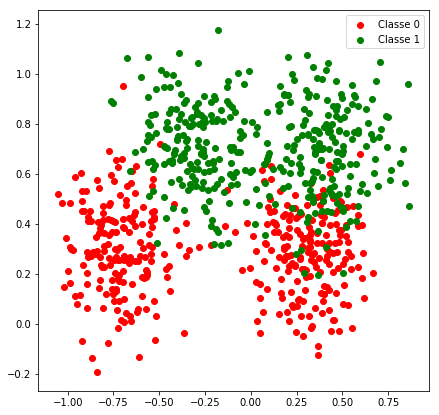

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(x_zeros[:,0], x_zeros[:,1], c='r')
plt.scatter(x_uns[:,0], x_uns[:,1], c='g')
plt.legend(['Classe 0', 'Classe 1'])

A seguir vamos calcular a curva de decisao da nossa rede, para isso queremos encontrar os pontos nos quais a saida da rede esta muito proxima de 0.5 (threshold).

In [36]:
x, y = np.meshgrid(np.linspace(-1,1,1000), np.linspace(-1,1,1000))
xy = np.array([x.flatten(),y.flatten()]).T

In [37]:
yt, _ = predict(xy)
xy = xy[np.abs(yt[:,0] - 0.5) < 0.005]

Caso o codigo acima nao te faca muito sentido, escrevi abaixo o jeito C de obter o mesmo resutaldo.

In [9]:
# x1, x2 = [], []
# for xx in np.linspace(-1, 1, 1000, dtype='float32'):
#     for xx2 in np.linspace(-1, 1, 1000, dtype='float32'):
#         yb, _ = predict(np.array([xx, xx2], dtype='float32'))
#         if abs(yb[0] - 0.5) < 0.005:
#             x1.append(xx)
#             x2.append(xx2)

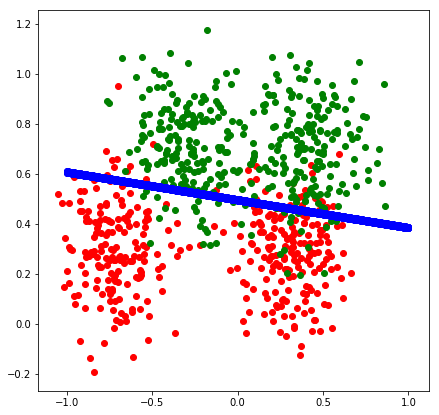

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(x_zeros[:,0], x_zeros[:,1], c='r')
plt.scatter(x_uns[:,0], x_uns[:,1], c='g')
plt.scatter(xy[:,0], xy[:,1], c='b')